In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import unidecode

In [2]:
df_clarin = pd.read_csv('tools/big_clarin.csv')
df_destape = pd.read_csv('tools/eldestapeweb.csv')
stopwords = pd.read_csv('tools/stopwords.csv', header= None)


In [3]:
df_clarin = df_clarin[pd.notnull(df_clarin['articleBody'])]
df_destape = df_destape[pd.notnull(df_destape['articleBody'])]

In [4]:
df_clarin['diario'] = 'clarin'
df_destape['diario'] = 'destape'

In [5]:
df_destape.head()

,articleBody,bajada,headline,link,section,source,volanta,diario
0,La ex presidenta y candidata a senadora de Uni...,La ex presidenta y candidata a senadora de Uni...,El cantito contra Clarín en medio del discurso...,http://www.eldestapeweb.com//el-fuerte-pedido-...,Política,eldestapeweb,Elecciones 2017,destape
1,Durante el discurso de la candidata a senadora...,Un fuerte repudio contra el grupo de medios má...,"El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//el-cantito-contra...,Política,eldestapeweb,Elecciones 2017,destape
2,Tras las elecciones legislativas de la semana ...,Crecen los rumores en torno a la posible desvi...,ESCÁNDALO | Empresario clave reveló el porcent...,http://www.eldestapeweb.com//macri-ya-tendria-...,Política,eldestapeweb,Macri Presidente,destape
3,Con un encendido discurso que apuntó a interpe...,La candidata a senadora cerró su campaña de ca...,"El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//las-10-frases-mas...,Política,eldestapeweb,Elecciones 2017,destape
4,Con un encendido discurso que apuntó a interpe...,"En medio de su discurso, la candidata a senado...","El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//el-calculo-matema...,Política,eldestapeweb,Elecciones 2017,destape


In [6]:
stopwords_list = stopwords[0].values
stopwords_list = list(stopwords_list)

In [7]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [8]:
def text_stemmer(text):
    texto = text.lower()
    unaccented_string = unidecode.unidecode(texto)
    stripped = re.sub('[^a-z0-9]+', ' ', unaccented_string).lstrip()
    stemmed = " ".join([stemmer.stem(x) for x in stripped.split(' ')])
    return stemmed

In [9]:
#Esto tarda bastante
df_clarin['articleBody2'] = df_clarin["articleBody"].apply(text_stemmer)
df_destape['articleBody2'] = df_destape["articleBody"].apply(text_stemmer)

In [10]:
df_clarin.head(5)

,Unnamed: 0,articleBody,bajada,date,headline,section,volanta,diario,articleBody2
0,0,Argentina XV ratificó la supremacía que ejerce...,"Cerró la temporada con una goleada, 82-7 a Uru...",2017-10-15 18:32:35.075360,Argentina XV se consagró bicampeón,Deportes,Rugby,clarin,argentin xv ratif la supremaci que ejerc en el...
1,1,En un informe de Transparencia Internacional -...,Un buen gobierno necesita participación activa...,2017-10-15 18:32:35.075360,De súbditos a ciudadanos,Opinión,Del editor al lector,clarin,en un inform de transparent internacional cuy ...
2,2,Instituto ratificó su liderazgo en el Grupo B ...,Superaron a Quimsa y a Olímpico respectivamente.,2017-10-15 18:32:35.075360,Súper 20: ganaron Instituto y Atenas,Deportes,Básquet,clarin,institut ratif su liderazg en el grup b del su...
3,3,"En un raid por dos programas de TV, el último ...",Estuvo en los programas de Jorge Lanata y Luis...,2017-10-15 18:32:35.075360,El raid televisivo de Elisa Carrió en el últim...,Política,Elecciones 2017,clarin,en un raid por dos program de tv el ultim domi...
4,4,"A una semana exacta de las elecciones, la gobe...","La gobernadora criticó al kirchnerismo: ""Duran...",2017-10-15 18:32:35.075360,"María Eugenia Vidal: ""No se puede joder con lo...",Política,A una semana de las elecciones,clarin,a una seman exact de las eleccion la gobern bo...


In [11]:
#Para comparar todas las secciones comentar esto
df_politica_destape = df_destape[(df_destape.section == 'Política') | (df_destape.section == 'PolÃ\xadtica')]
df_politica_clarin = df_clarin[(df_clarin.section == 'Política')]
df = pd.concat([df_politica_clarin,df_politica_destape])

In [12]:
X = df['articleBody2']
y = df['diario']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [14]:
#Vectorizar 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents= 'ascii', stop_words= stopwords_list)
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train)

X_train_counts.shape

(792, 12536)

In [15]:
#frecuencia por palabra (por alguna razon funciona peor el TDiDF)
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(strip_accents= 'ascii', stop_words= stopwords_list)
#tfidf.fit(X_train)
#X_train_tfidf = tfidf.transform(X_train)

#X_train_tfidf.shape

In [16]:
X_test_counts = count_vect.transform(X_test)
#X_test_tfidf = tfidf.transform(X_test)


### Multinomial Naive Bayes

In [17]:
model_multinb = MultinomialNB().fit(X_train_counts, y_train)
y_pred_multinb = model_multinb.predict(X_test_counts)

print('Accuracy Multi NB: ',accuracy_score(y_pred_multinb, y_test))

Accuracy Multi NB:  0.887468030691


In [18]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_multinb


### KNN

In [19]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print('Accuracy KNN: ',accuracy_score(y_pred_knn, y_test))

Accuracy KNN:  0.841432225064


In [20]:
# Calculamos nuevamente los scores de cross validation, pero esta vez sobre los features estandarizados
X_counts = count_vect.transform(X)
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,100,5):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model_knn, X_counts, y, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [21]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,n_neighbours,score_medio,score_std
0,1,0.838490,0.027405
1,6,0.850333,0.027627
2,11,0.841018,0.036413
3,16,0.844400,0.035083
4,21,0.839319,0.040662


In [22]:
# Armamos nuevamente los límites para graficar
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

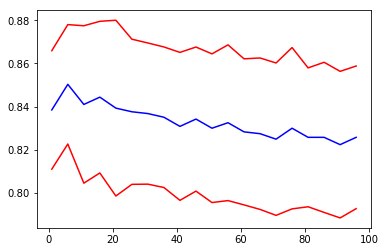

In [23]:
# Buscamos gráficamente el valor ópitmo para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

### SVM

In [24]:
svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]
for c in svc_C:
    for g in svc_gamma:
        model_svm = SVC(kernel='rbf', class_weight='balanced', C=c, gamma = g)
        print (np.mean(cross_val_score(model_svm,X_train_counts,y_train,cv=5)),' gamma:',g,' C:',c)

0.883854788631  gamma: 0.0001  C: 1
0.910397261365  gamma: 0.0005  C: 1
0.90913143858  gamma: 0.001  C: 1
0.852328636255  gamma: 0.005  C: 1
0.915436669055  gamma: 0.0001  C: 5
0.933118382294  gamma: 0.0005  C: 5
0.92678926837  gamma: 0.001  C: 5
0.861149590001  gamma: 0.005  C: 5
0.931860520659  gamma: 0.0001  C: 10
0.938149828835  gamma: 0.0005  C: 10
0.926781307221  gamma: 0.001  C: 10
0.861149590001  gamma: 0.005  C: 10
0.93688400605  gamma: 0.0001  C: 50
0.938157789985  gamma: 0.0005  C: 50
0.926781307221  gamma: 0.001  C: 50
0.861149590001  gamma: 0.005  C: 50


In [25]:
model_svm = SVC(kernel='rbf', class_weight='balanced', C=50, gamma = 0.0001)
model_svm.fit(X_train_counts,y_train)
y_pred_svm = model_svm.predict(X_test_counts)
print('Accuracy SVM: ',accuracy_score(y_pred_svm, y_test))

Accuracy SVM:  0.961636828645


### Regresión Logística

In [26]:
model_log = LogisticRegression(C=0.1)
model_log.fit(X_train_counts, y_train)
y_pred_log = model_log.predict(X_test_counts)
print('Accuracy Logistic Regression: ',accuracy_score(y_pred_log, y_test))

Accuracy Logistic Regression:  0.95652173913


In [27]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_log
df_results.head(10)

,articleBody2,Prediction
406,la ministr de segur patrici bullrich asegur qu...,destape
290,sergi maldon afirm este lun que tien esper de ...,destape
189,la ex president cristin kirchn fue categor al ...,destape
559,las escuch ilegal entre cristin kirchn y oscar...,destape
736,com gerent del banc de sant cruz lazar baez in...,clarin
1349,el gobiern de la provinci de buen air notif ay...,clarin
337,la secretari general de la asociacion del magi...,clarin
682,a los poc dias de desaparec a santiag maldon l...,destape
859,apes de la sangri que sufri desd que cristin k...,clarin
449,milagr sal esta cad vez mas cerc de abandon el...,clarin


In [32]:
df_results.to_csv('output/predictions.csv')

### Esto es extra. Intentando clasificar el sesgo politico entre clarin y destape y luego clasificar en p12

In [33]:
#df_clarin_prueba = pd.read_csv('tools/clarin.csv')
df_p12 = pd.read_csv('tools/pagina12.csv')

In [34]:
df_p12 = df_p12[df_p12['cuerpo'].notnull()].copy()
df_p12.suplemento.unique()

array([nan, 'El país', 'El mundo', 'Sociedad', 'Deportes', 'Contratapa',
       'Economía', 'Universidad', 'Plástica'], dtype=object)

In [35]:
df_p12_section = df_p12[df_p12.suplemento == 'El país']

In [36]:
df_p12_section['cuerpo2'] = df_p12_section["cuerpo"].apply(text_stemmer)
X_p12 = df_p12_section['cuerpo2'].copy()
df_p12_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 1 to 220
Data columns (total 9 columns):
Unnamed: 0    65 non-null int64
cuerpo        65 non-null object
fecha_hora    65 non-null object
imagen        65 non-null object
resumen       37 non-null object
suplemento    65 non-null object
titulo        65 non-null object
url           65 non-null object
cuerpo2       65 non-null object
dtypes: int64(1), object(8)
memory usage: 5.1+ KB


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
X_test_counts = count_vect.transform(X_p12)
y_pred_svm = model_svm.predict(X_test_counts)
y_pred_svm

array(['destape', 'destape', 'clarin', 'destape', 'destape', 'destape',
       'clarin', 'clarin', 'clarin', 'clarin', 'destape', 'destape',
       'destape', 'destape', 'clarin', 'clarin', 'destape', 'clarin',
       'clarin', 'clarin', 'destape', 'clarin', 'clarin', 'clarin',
       'destape', 'clarin', 'clarin', 'clarin', 'clarin', 'destape',
       'clarin', 'destape', 'clarin', 'destape', 'clarin', 'destape',
       'clarin', 'destape', 'destape', 'clarin', 'clarin', 'clarin',
       'destape', 'destape', 'destape', 'destape', 'clarin', 'destape',
       'clarin', 'destape', 'clarin', 'clarin', 'destape', 'destape',
       'destape', 'clarin', 'destape', 'clarin', 'clarin', 'clarin',
       'destape', 'destape', 'destape', 'destape', 'destape'], dtype=object)

In [38]:
y_test_destape = ['destape']*65
print('Accuracy SVM: ',accuracy_score(y_pred_svm, y_test_destape))

Accuracy SVM:  0.507692307692


In [39]:
df_results = pd.DataFrame(X_p12)
df_results['Prediction'] = y_pred_svm
df_results.head(10)

,cuerpo2,Prediction
1,los comici par eleg gobern en corrient cerr pa...,destape
5,en un nuev acto de campan esta vez en malvin a...,destape
6,siganl busc fue la cinic respuest de dos agent...,clarin
7,esta manan el gobern correntin ricard colombi ...,destape
9,el viern por la noch milagr sal fue notific de...,destape
70,en su inform la fundacion soberani sanitari se...,destape
71,mientr crec la emergent en los hospital public...,clarin
72,no pued ser que la logic sea que cad gobiern t...,clarin
73,necesit gan a cristin fernandez de kirchn ese ...,clarin
74,desd corrient al cierr de esta edicion la alia...,clarin


In [41]:
df_results.to_csv('output/predictions_p12.csv')